# Figure 8.
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/22/2025          |
| Updated |  08/22/2025          |

Relative error in radial flux $F_r$ as a function of optical depth $\tau$ compared to analytic ray tracing [equation (28)] for gray models with radiative attenuation only (i.e., without dust heating).
Line styles correspond to radial profiles at different disk latitudes (cf. Figure 6), while colors show models with different numbers of logarithmically spaced grid cells radially $N_r$.

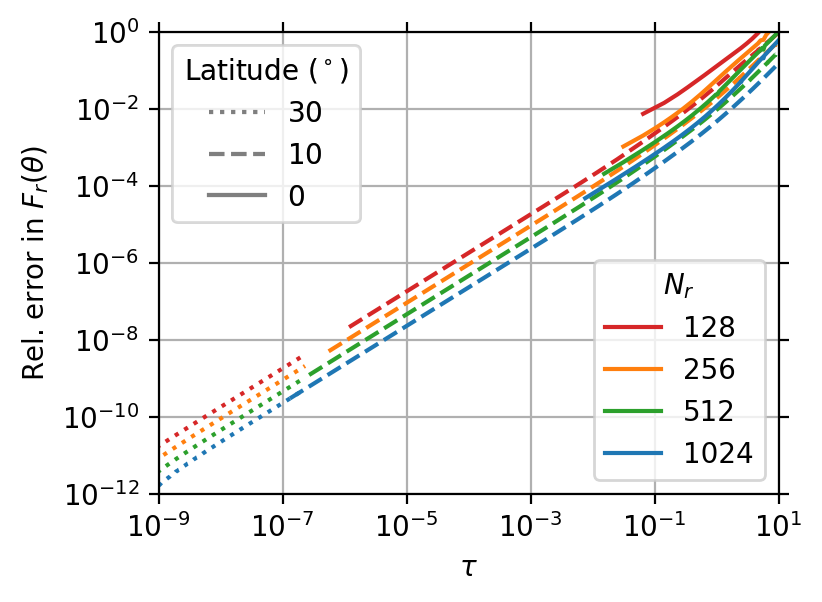

In [ ]:
#===============================================================================
import athena_read
import matplotlib.pyplot as plt
import numpy as np

# Constants
rad2deg = 180/np.pi

# Read and plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
lss = ['dotted', 'dashed', 'solid']
theta_degs = [60, 80, 90]
c_solns, ls_thetas = [], []
problem_id = 'dsharp'
root = '../athena/models/gray_opac/attenuation'
runs = ['128', '256', '512', '1024']

for i, run in enumerate(runs):
    path = f'{root}/{run}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    r_star = athinput['problem']['r_star']
    t_star = athinput['problem']['t_star']
    dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
             /athinput['mesh']['nx2']
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
    dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
    tau = np.cumsum(dtau, axis=1)
    f_r_min = 1e-14
    f_r = np.clip(athdf['Fr1'][0], f_r_min, None)
    f_r_theo = np.power(t_star, 4)*np.power(r_star/athdf['x1v'], 2)\
              /4*(np.exp(-tau))
    f_r_theo = np.clip(f_r_theo, f_r_min, None)
    for th, theta_deg in enumerate(theta_degs):
        j = int(theta_deg/rad2deg/dtheta)
        rel_err_Fx = np.abs(f_r_theo[j,:] - f_r[j, :])/f_r_theo[j,:]
        ax.plot(tau[j, :], rel_err_Fx, color=tab_colors[i], ls=lss[th])
        if i == 0:
            ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                            label=rf'${90-theta_deg}$')[0])
    c_solns.append(ax.plot([], [], tab_colors[i], label=f'{run}')[0])

# Plot ghost points for colorless line style and add legends
ax.add_artist(plt.legend(title=r'$N_r$', handles=c_solns, loc='lower right'))
ax.add_artist(ax.legend(framealpha=0.56, handles=ls_thetas, loc='upper left',
                        title=r'Latitude ($^\circ)$'))

# Format plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel=r'$\tau$', xlim=(1e-9, 1e1), xscale='log',
       ylabel=r'Rel. error in $F_r(\theta)$', ylim=(1e-12, 1), yscale='log')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig('figs/attenuation.pdf', bbox_inches='tight', pad_inches=0.01)
#===============================================================================